In [2]:
import coffea
import coffea.hist as hist
import mplhep as hep
import numpy as np

import awkward as ak
import uproot

import matplotlib.pyplot as plt
import mplhep as hep

## Why columnar?

Short ans: Vector instruction makes implicit loop faster and more readible code

In [3]:
data = np.array([1,2,3,4,1,4,20])
#Explicit loop
s=0
for d in data:
    s+= d
print(s)

#Implicit loop
print(np.sum(data))

35
35


### Our event data is an irregular array

In [5]:
data = [
    [45,45,10],
    [40,30],
    [45,45,10,1,4],
]

In [15]:
np.sum(np.array(data))

[45, 45, 10, 40, 30, 45, 45, 10, 1, 4]

In [16]:
ak.sum(ak.Array(data),axis=1)

<Array [100, 70, 105] type='3 * int64'>

In [17]:
ak.firsts(data)

<Array [45, 40, 45] type='3 * ?int64'>

In [21]:
ak_data = ak.Array(data)
ak.to_list(ak_data>20)

[[True, True, False], [True, True], [True, True, False, False, False]]

In [22]:
ak_data[ak_data>20]

<Array [[45, 45], [40, 30], [45, 45]] type='3 * var * int64'>

In [24]:
ak.sum(ak_data[ak_data>20],axis=1)

<Array [90, 70, 90] type='3 * int64'>

## Reading HNL tree

In [2]:
def getLZDF(f,nEvents=-1):
    events_raw = uproot.open(f)['MuonSystem']
    df = coffea.processor.LazyDataFrame(events_raw,entrystop=nEvents)
    start,stop = df._branchargs['entry_start'],df._branchargs['entry_stop']
    events = uproot.lazy(df._tree)
    events = events[start:stop]
    return events

In [4]:
events= getLZDF("/uscms/home/kkwok/lpclonglived/HNL/skim/HNL_electronType_mHNL4p0_pl1000/HeavyNeutralLepton_Tree_0.root",10)

In [5]:
events.fields

['runNum',
 'lumiSec',
 'evtNum',
 'mH',
 'mX',
 'ctau',
 'ZCategory',
 'category',
 'npv',
 'npu',
 'weight',
 'scaleWeights',
 'lepOverallSF',
 'sf_facScaleUp',
 'sf_facScaleDown',
 'sf_renScaleUp',
 'sf_renScaleDown',
 'sf_facRenScaleUp',
 'sf_facRenScaleDown',
 'metSF',
 'pileupWeight',
 'pileupWeightUp',
 'pileupWeightDown',
 'Flag_HBHENoiseFilter',
 'Flag_BadPFMuonFilter',
 'Flag_HBHEIsoNoiseFilter',
 'Flag_CSCTightHaloFilter',
 'Flag_globalSuperTightHalo2016Filter',
 'Flag_goodVertices',
 'Flag_ecalBadCalibFilter',
 'Flag_BadChargedCandidateFilter',
 'Flag_eeBadScFilter',
 'Flag_all',
 'Flag2_HBHENoiseFilter',
 'Flag2_HBHEIsoNoiseFilter',
 'Flag2_BadPFMuonFilter',
 'Flag2_globalSuperTightHalo2016Filter',
 'Flag2_globalTightHalo2016Filter',
 'Flag2_BadChargedCandidateFilter',
 'Flag2_EcalDeadCellTriggerPrimitiveFilter',
 'Flag2_ecalBadCalibFilter',
 'Flag2_eeBadScFilter',
 'Flag2_all',
 'EE_prefiring',
 'rho',
 'met',
 'metNoMu',
 'metPhi',
 'metXYCorr',
 'metPhiXYCorr',
 'HT',
 

## Reading HNL tree: method 2

In [ ]:
events = uproot.lazy("/uscms/home/kkwok/lpclonglived/HNL/HNL_electronType_mHNL4p0_pl1000/HeavyNeutralLepton_Tree_1*.root:MuonSystem")


### Reading HNL tree: method 3

In [31]:
events.metXYCorr

<Array [68.3, 55.2, 29.4, ... 45.5, 89.7, 13.2] type='13264 * float32'>

In [35]:
events.gLLP_csc[1:10]

<Array [[0], [0], [0], ... [0], [0], [0]] type='9 * 1 * float32'>

In [36]:
llp=ak.zip({
    'pt':events.gLLP_pt,
    'e':events.gLLP_e,
    'z':events.gLLP_decay_vertex_z ,
    'r':events.gLLP_decay_vertex_r,
})  

In [37]:
llp.e

<Array [[325], [142], ... [414], [37.6]] type='13264 * var * float32'>

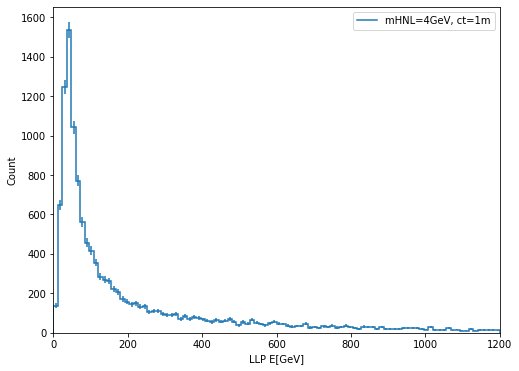

In [47]:
h = hist.Hist("Count",
             hist.Bin("energy","LLP E[GeV]",100,0,1200))

fig, axs = plt.subplots(1,figsize=(8,6))

h.fill(energy=ak.flatten(llp.e))

hist.plot1d(h,ax=axs)
axs.legend(["mHNL=4GeV, ct=1m"])